In [ ]:
#Inventory Demand Forecasting – Zepto

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('zepto_logistics_cleaned.csv')


In [2]:
#Aggregate Product Demand

df['order_day'] = (pd.Series(range(1, len(df)+1)) % 30) + 1  # fake 30-day cycle

product_daily_demand = df.groupby(['order_day', 'name'])['quantity'].sum().reset_index()


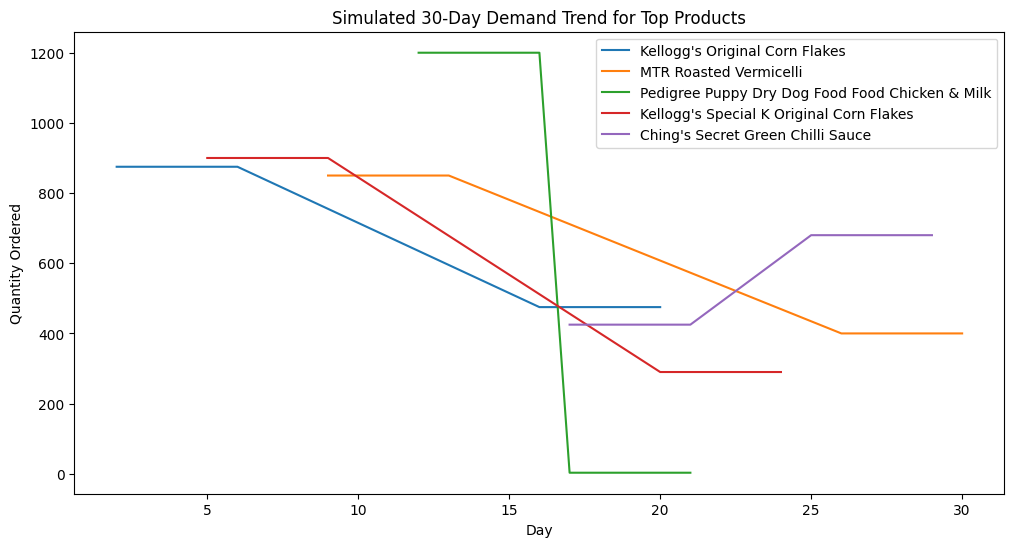

In [3]:
#Visualize Demand Trend for Top Products

# Top 5 products by total quantity
top_products = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5).index.tolist()

# Plot daily demand trend
plt.figure(figsize=(12,6))
for product in top_products:
    data = product_daily_demand[product_daily_demand['name'] == product]
    sns.lineplot(data=data, x='order_day', y='quantity', label=product)

plt.title("Simulated 30-Day Demand Trend for Top Products")
plt.xlabel("Day")
plt.ylabel("Quantity Ordered")
plt.legend()
plt.show()


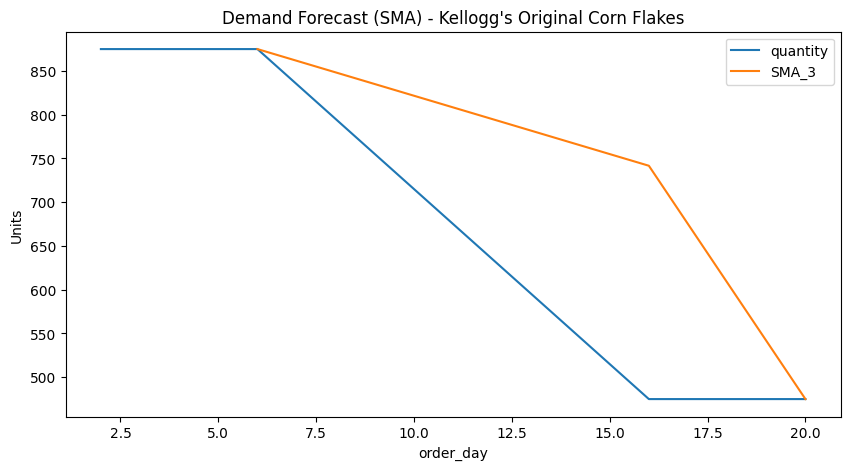

In [4]:
#Forecasting with Simple Moving Average (SMA)

# Forecast using SMA for 1 product as example
product_data = product_daily_demand[product_daily_demand['name'] == top_products[0]]
product_data = product_data.set_index('order_day')
product_data['SMA_3'] = product_data['quantity'].rolling(window=3).mean()

# Plot
product_data[['quantity', 'SMA_3']].plot(figsize=(10,5), title=f"Demand Forecast (SMA) - {top_products[0]}")
plt.ylabel("Units")
plt.show()


In [5]:
# Exporting grouped product-level demand 

demand_summary = df.groupby('name')['quantity'].sum().reset_index().rename(columns={'quantity': 'Total_Demand'})
demand_summary.to_csv('product_demand_forecast.csv', index=False)

print("✅ Forecast summary saved as 'product_demand_forecast.csv'")


✅ Forecast summary saved as 'product_demand_forecast.csv'


In [ ]:
# Inventory Demand Forecasting
In this notebook, we simulate and analyze product-wise demand over a 30-day cycle using order volume. We forecast future trends using moving averages and export summary data for inventory management decisions.

## Key Takeaways:
- Top-demand products identified for restocking priority
- Time-based trend analysis enables smart purchasing
- Forecasting aids in reducing overstock and out-of-stock risks
